# Myers-Briggs Personalities Analysis and Classification 

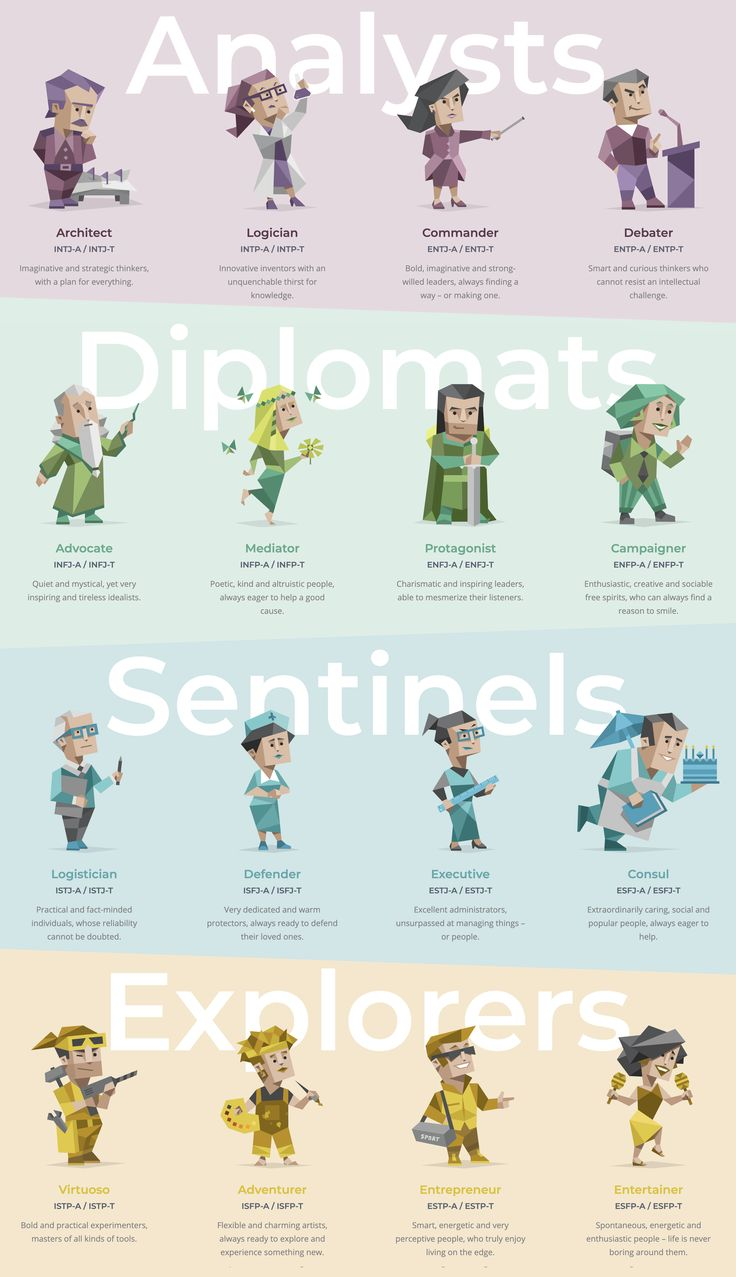

## Objective

This project aims to scrutinize a synthetic dataset comprising more than 60,000 responses to Myers-Briggs Personality type questions, with the goal of classifying these responses into one of the 16 distinct personality types outlined above. It is essential to note that the data utilized in this analysis is synthetic and may not perfectly represent real-world responses.

## Setup

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

#### Reading in the Data

In [2]:
df = pd.read_csv(r'C:\Users\ankit\Personality Classification\MyersBriggsPersonalities.csv', encoding='latin1')

#### Preliminary Look at the Data

In [3]:
df.head()

,Response ID,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,1,0,0,1,0,0,-2,2,0,1,...,-1,2,0,1,0,0,-1,3,1,ISFJ
1,2,1,0,-1,-3,-1,-1,-1,0,0,...,0,0,-1,0,0,-1,-2,2,1,ISFJ
2,3,0,0,2,1,-1,-1,0,0,1,...,0,2,0,1,0,0,0,2,2,ISFJ
3,4,0,0,0,1,0,-1,2,1,1,...,0,1,0,2,0,1,-1,1,2,ISFJ
4,5,0,1,1,1,-2,0,0,0,-1,...,0,2,0,0,0,0,0,1,-1,ISFJ


**Observation:** Each row corresponds to a single person's answers to all 60 questions. The last column corresponds to the assigned personality test of each person in each row. We can see each question answer is an integer encoded as follows: \
Fully Disagree: -3 \
Partially Disagree: -2 \
Slightly Disagree: -1 \
Neutral: 0\
Slightly Agree: 1 \
Partially Agree: 2\
Fully Agree: 3

## Data Cleaning

#### Dropping Duplicates

In [4]:
df.drop_duplicates()

,Response ID,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,1,0,0,1,0,0,-2,2,0,1,...,-1,2,0,1,0,0,-1,3,1,ISFJ
1,2,1,0,-1,-3,-1,-1,-1,0,0,...,0,0,-1,0,0,-1,-2,2,1,ISFJ
2,3,0,0,2,1,-1,-1,0,0,1,...,0,2,0,1,0,0,0,2,2,ISFJ
3,4,0,0,0,1,0,-1,2,1,1,...,0,1,0,2,0,1,-1,1,2,ISFJ
4,5,0,1,1,1,-2,0,0,0,-1,...,0,2,0,0,0,0,0,1,-1,ISFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60175,896,0,0,2,-1,-2,1,1,0,2,...,0,2,0,-1,0,0,0,0,0,INFJ
60176,897,0,0,0,0,-1,1,2,0,3,...,0,1,0,2,0,0,0,1,0,INFJ
60177,898,0,0,2,-1,0,0,3,0,2,...,0,1,0,2,0,0,1,2,0,INFJ
60178,899,0,0,0,-2,-1,0,1,0,0,...,0,2,0,2,0,0,1,2,2,INFJ


#### Examining Data Types and Null Counts

Here we see all 60 questions entered as columns in our DataFrame. There also appear to be no null values and the data types are correct.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60180 entries, 0 to 60179
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response ID                                                                                                           60180 non-null  int64 
 1   You regularly make new friends.                                                                                       60180 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            60180 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             60180 non-null  int64 
 4   You often 

## Exploratory Data Analysis

#### Descriptive Statistics

In [6]:
df.describe()

,Response ID,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
count,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,...,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000,60180.000000
mean,2607.389332,0.002277,-0.003656,0.049684,-0.212712,-0.191941,0.012546,-0.434729,-0.002841,0.080608,...,-0.000017,-0.000515,0.170871,-0.001147,0.113443,0.001878,0.001695,0.056896,0.121186,0.296062
std,1981.016718,0.365485,0.362988,1.532249,1.509218,1.494668,1.514941,1.463292,0.370045,1.544963,...,0.364628,0.367397,1.515842,0.362248,1.521983,0.364258,0.361856,1.525400,1.528491,1.520396
min,1.000000,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-1.000000,-3.000000,-3.000000,-3.000000
25%,943.750000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,2145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4005.250000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,8280.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000


**Observation:** From these descriptive statistics, the first thing we notice is that most of the mean answers to the questions are relatively close to 0, meaning that, on average, people tend to be neutral on most questions. 

#### Creating Histograms

Lets create a histogram of Question 5 ("You usually stay calm, even under a lot of pressure"). The mean is fairly close to 0, being slightly negative meaning people tend to very slightly disagree with this question on average.

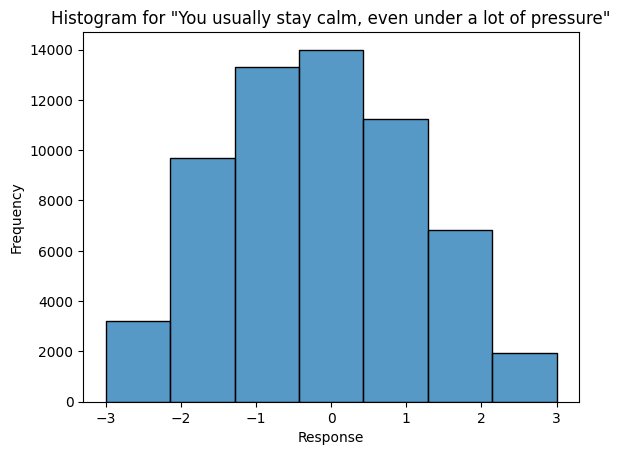

In [7]:
#Histogram for question 5
question_column = 'You usually stay calm, even under a lot of pressure'  
sns.histplot(df[question_column], bins=7, kde=False)
plt.title(f'Histogram for "{question_column}"')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

**Observation:**  Looking at the histogram for this question, we can see the most common response is neutral, with a few more responses disagreeing than agreeing. 

#### Creating Histograms where the Most Common Response is not Neutral

Now lets see some questions that were a bit more polarizing, where people either agreed or disagreed more than being neutral. 

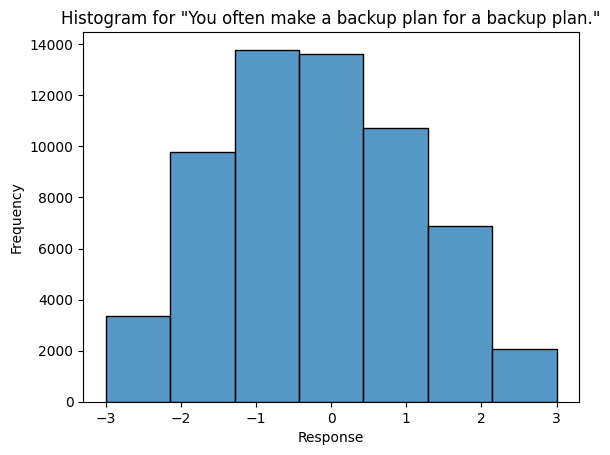

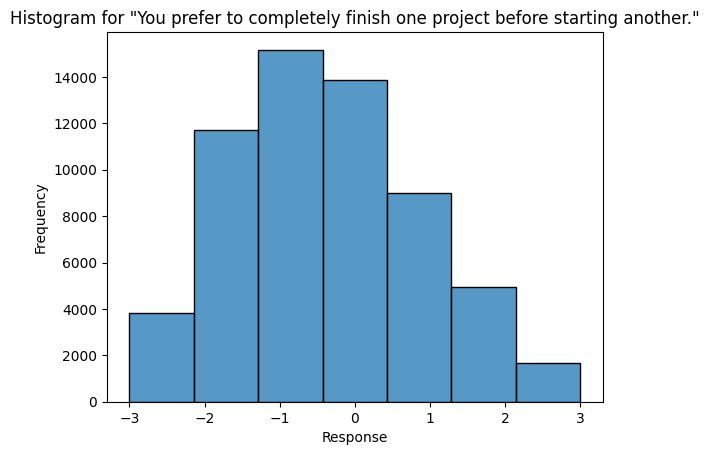

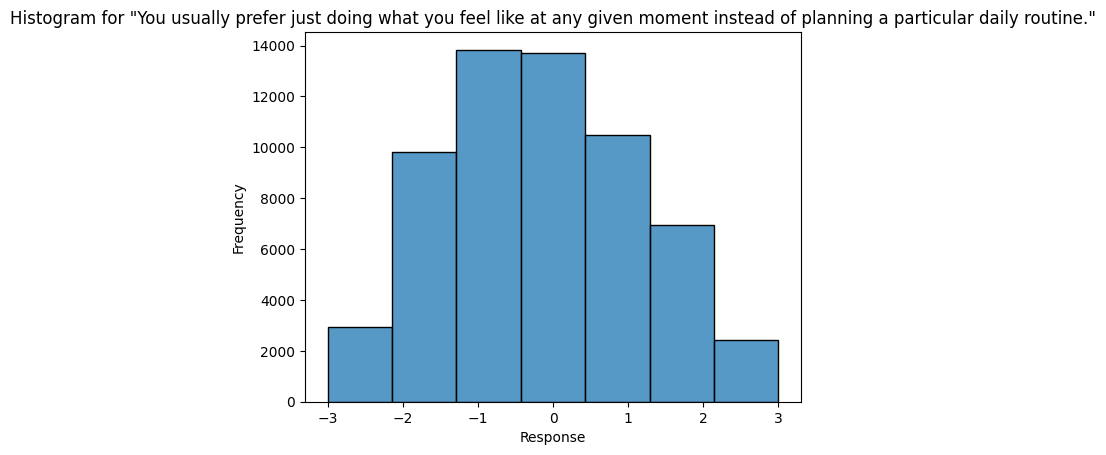

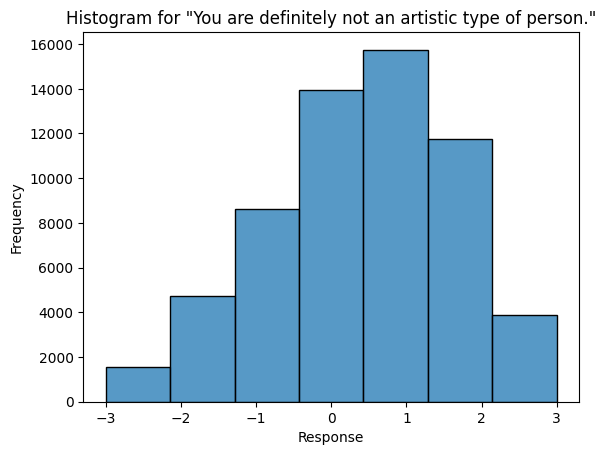

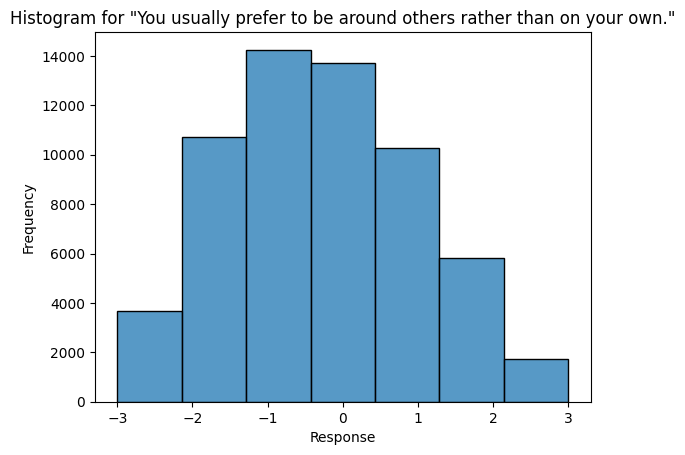

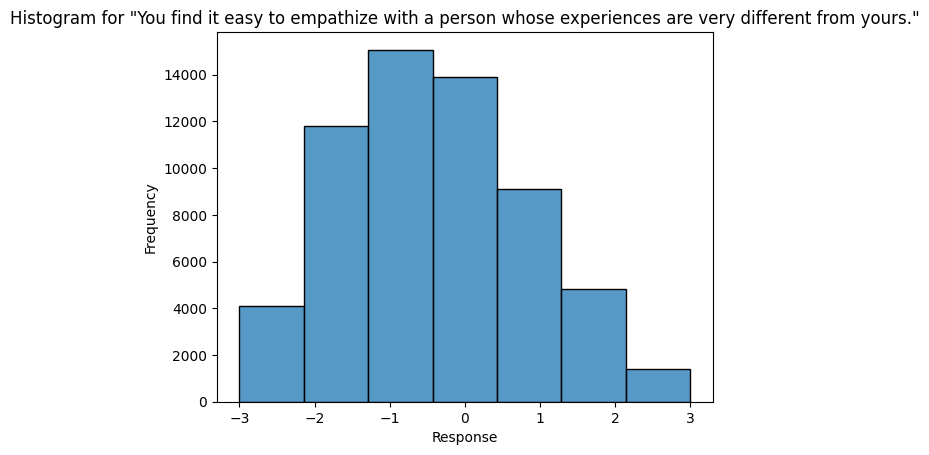

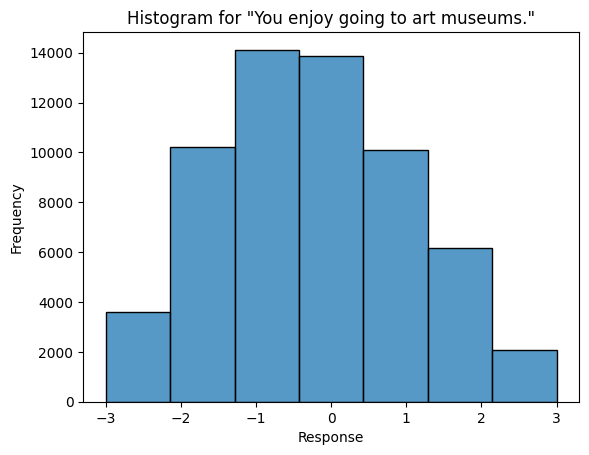

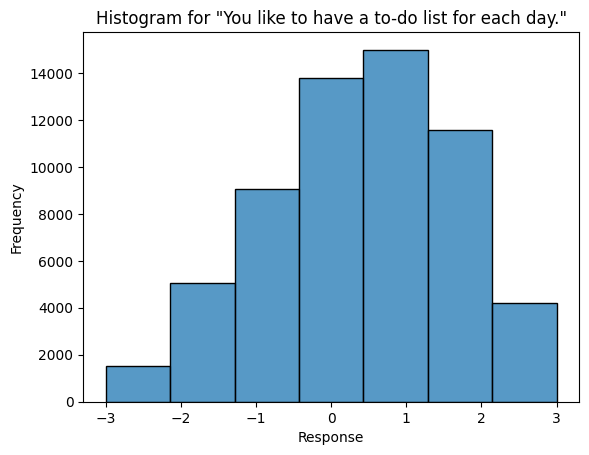

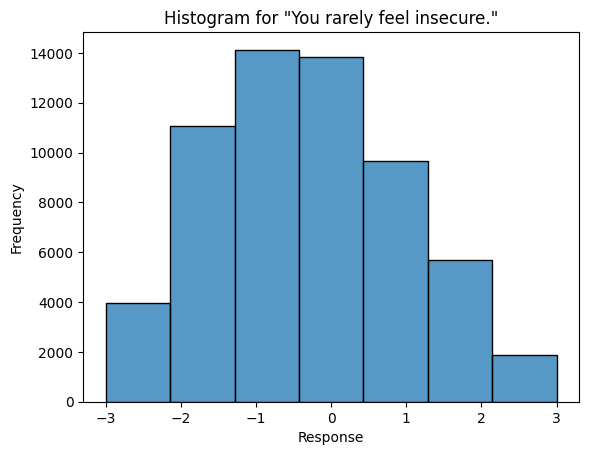

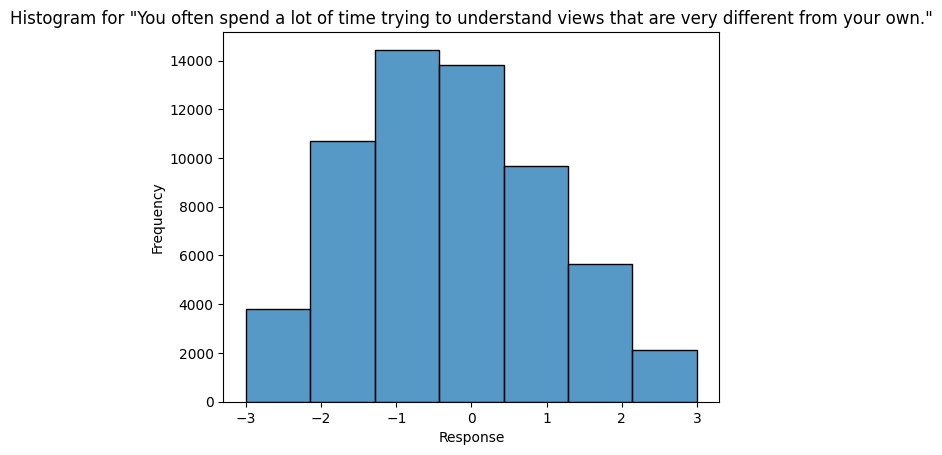

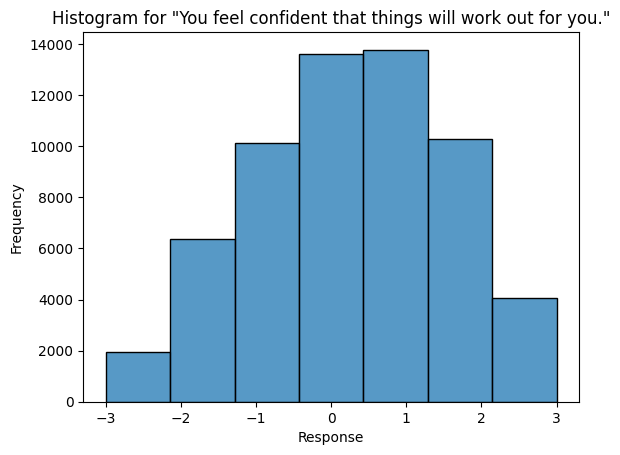

In [8]:
# Generate histograms for questions where the most common response is not 0
for column in df.columns[1:-1]:  # Exclude the 'Response Id' and 'Personality' columns
    most_common_response = df[column].mode().values[0]
    
    if most_common_response != 0:
        sns.histplot(df[column], bins=7, kde=False)
        plt.title(f'Histogram for "{column}"')
        plt.xlabel('Response')
        plt.ylabel('Frequency')
        plt.show()

**Observation:** 
We can see the 11/60 questions in which the most common response was not neutral. Perhaps, this could be attributed to certain biases in people taking these personality quizzes. 
For instance, the question "You enjoy going to art museums" exhibited a skewed distribution, indicating a possible age-related preference. Younger participants might be more inclined to disagree with this statement.This insight, derived from the histogram, hints at interesting patterns that could be further explored through more in-depth analysis.

#### Histogram of Personality Types

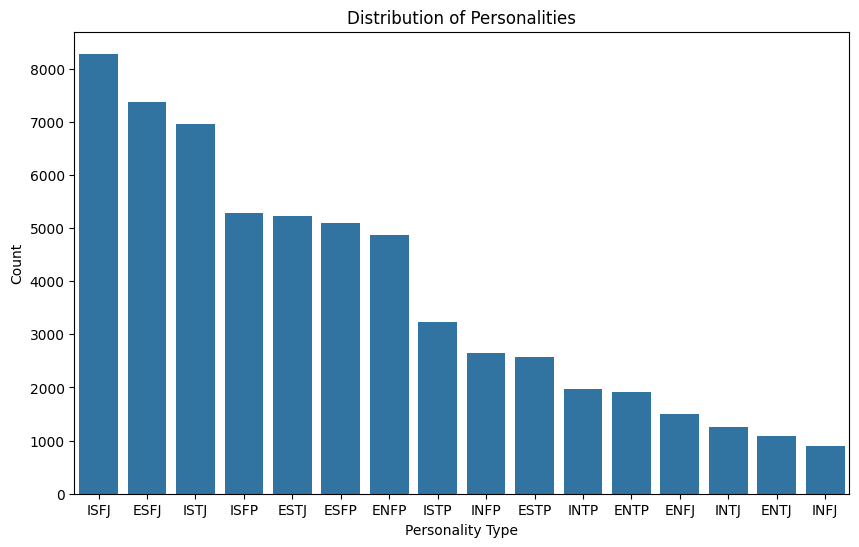

In [9]:
# Countplot for personality distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Personality', data=df, order=df['Personality'].value_counts().index)
plt.title('Distribution of Personalities')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()

**Observation:** The most common personality type is ISFJ, "The Defender", and the least common personality type is INFJ, "The Advocate".

#### Correlation Matrices

In [56]:
# Calculate and print the correlation matrix
correlation_matrix = df.drop(['Response ID', 'Personality'], axis=1).corr()

**Observation:** We've created correlation matrices of every question, but there is far too much information here to make accurate judgments, so let's just print the top 10 positive and negative correlations.

#### 10 Most Positive Correlations

In [32]:
top_correlations = (correlation_matrix
                    .unstack()  # Unstack to pairs of columns
                    .sort_values(ascending=False)  # Sort in descending order
                    .drop_duplicates(keep='first')  # Drop duplicates
                    .head(11)  # Take the top 11 (excluding 1)
                    .reset_index()  # Reset index for better display
                    .rename(columns={0: 'Correlation'})
                   )

# Filter out correlations equal to 1
top_correlations = top_correlations[top_correlations['Correlation'] < 1]

# Display the top correlations
print("Top 10 Most Positive Correlations")
print(top_correlations)

Top 10 Most Positive Correlations
                                              level_0                                            level_1  Correlation
1   Seeing other people cry can easily make you fe...  Your happiness comes more from helping others ...     0.213354
2   Seeing other people cry can easily make you fe...  You feel comfortable just walking up to someon...     0.212473
3                         You often feel overwhelmed.  You like to use organizing tools like schedule...     0.206732
4   You would pass along a good opportunity if you...   You tend to avoid drawing attention to yourself.     0.198698
5                    You enjoy watching people argue.                    You enjoy going to art museums.     0.196060
6   You rarely second-guess the choices that you h...  You have always been fascinated by the questio...     0.192069
7                     You enjoy going to art museums.  You are still bothered by mistakes that you ma...     0.186194
8                  You

**Observation:** The columns "Seeing other people cry can easily make you feel like you want to cry too" and "Your happiness comes more from helping others accomplish things than your own accomplishments" show the highest positive correlation. This aligns with the idea that those who are more empathetic may agree with both statements, resulting in the observed moderate positive correlation.

#### 10 Most Negative Correlations

In [30]:
top_correlations = (correlation_matrix
                    .unstack()  # Unstack to pairs of columns
                    .sort_values(ascending=True)  # Sort in descending order
                    .drop_duplicates(keep='first')  # Drop duplicates
                    .head(11)  # Take the top 11 (excluding 1)
                    .reset_index()  # Reset index for better display
                    .rename(columns={0: 'Correlation'})
                   )

# Filter out correlations equal to 1
top_correlations = top_correlations[top_correlations['Correlation'] < 1]

# Display the top correlations
print("Top 10 Most Negative Correlations")
print(top_correlations)

Top 10 Most Negative Correlations
                                              level_0                                            level_1  Correlation
0   You would pass along a good opportunity if you...  You are interested in so many things that you ...    -0.223054
1   You usually prefer just doing what you feel li...  You like books and movies that make you come u...    -0.222825
2   You often have a hard time understanding other...  You are more inclined to follow your head than...    -0.195232
3                           You rarely feel insecure.  After a long and exhausting week, a lively soc...    -0.191339
4   You are still bothered by mistakes that you ma...                       You struggle with deadlines.    -0.182705
5   You rarely second-guess the choices that you h...  You like books and movies that make you come u...    -0.178898
6   At social events, you rarely try to introduce ...    You often make a backup plan for a backup plan.    -0.177092
7   You prefer to comp

**Observation:** The columns "You would pass along a good opportunity if you thought someone else needed it more" and "You are interested in so many things that you find it difficult to choose what to try next" show the highest negative correlation. This corresponds to the tendency for individuals inclined toward altruism to agree more with the first question, while those leaning towards self-interest may align more with the second. This may contribute to the observed negative correlation between the two questions.

## Machine Learning Models

#### Splitting the DataFrame into Training and Testing

We will use 80% of the data for training and 20% for testing, seeing how well our models can do at predicting personality types.

In [33]:
X = df.drop(['Response ID', 'Personality'], axis=1)
y = df['Personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Model

In [35]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:%}")

Accuracy: 98.396477%


**Observation:** The model exhibits high accuracy, surpassing 98%, indicating its proficiency in making accurate predictions for the personality types based on the given data.

#### Random Forest Confusion Matrix

In [36]:
personality_labels = ["ISFJ", "ESFJ", "ISTJ", "ISFP", "ESTJ", "ESFP", "ENFP", "ISTP", 
                           "INFP", "ESTP", "INTP", "ENTP", "ENFJ", "INTJ", "ENTJ", "INFJ"]
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=personality_labels)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=personality_labels, columns=personality_labels))

Confusion Matrix:
      ISFJ  ESFJ  ISTJ  ISFP  ESTJ  ESFP  ENFP  ISTP  INFP  ESTP  INTP  ENTP  ENFJ  INTJ  ENTJ  INFJ
ISFJ  1646     0     0     0     2     1     0     0     0     2     0     0     1     0     0     0
ESFJ     0  1478     0     0     0     1     0     0     0     0     1     0     1     1     0     0
ISTJ     0     1  1360     0     1     0     0     0     1     0     0     0     0     0     0     0
ISFP     0     1     0  1027     0     1     1     0     0     0     0     1     0     0     0     0
ESTJ     1     0     1     0  1073     1     0     0     0     1     0     1     0     0     0     0
ESFP     0     0     0     1     1  1011     1     1     0     0     0     0     1     0     0     0
ENFP     1     3     0     3     0     1   965     0     0     0     0     0     0     1     0     0
ISTP     2     1     0     2     2     3     0   639     0     0     0     0     0     1     0     0
INFP     1     0     2     2     2     0     0     0   511     0     0   

**Observation:** The confusion matrix illustrates the correspondence between actual and predicted personality types. Notably, personality types with lower representation in the histogram tend to have higher instances of misclassification, impacting their recall. Further insights can be gained by examining the classification report.

#### Random Forest Classification Report

In [37]:
# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.98      0.94      0.96       300
        ENFP       0.99      0.99      0.99       974
        ENTJ       1.00      0.91      0.95       222
        ENTP       0.98      0.96      0.97       386
        ESFJ       0.98      1.00      0.99      1482
        ESFP       0.98      1.00      0.99      1016
        ESTJ       0.98      1.00      0.99      1078
        ESTP       0.99      0.98      0.98       505
        INFJ       0.99      0.81      0.89       194
        INFP       0.99      0.99      0.99       518
        INTJ       0.98      0.91      0.95       256
        INTP       0.99      0.97      0.98       409
        ISFJ       0.99      1.00      0.99      1652
        ISFP       0.98      1.00      0.99      1031
        ISTJ       0.98      1.00      0.99      1363
        ISTP       0.99      0.98      0.99       650

    accuracy                           0.98     12036
   

**Observation:** The classification report highlights that personality types with lower representation in the histogram, specifically 'INTJ', 'INFJ', and 'ENTJ', exhibit lower recall. This discrepancy might be mitigated by incorporating more data, keeping it aligned with the actual representation. The classification report further delves into metrics like precision, f1-score, macro average, and weighted average, providing a comprehensive evaluation of the model's performance.

#### Random Forest Feature Importance

<Axes: title={'center': 'Top 10 Feature Importance'}>

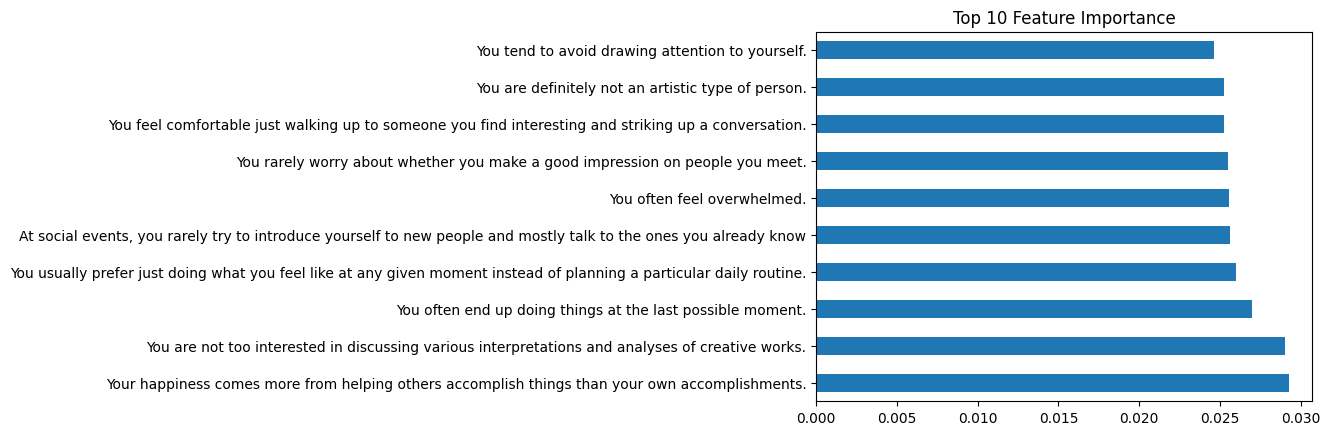

In [39]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', title='Top 10 Feature Importance')

**Observation:** The questions that the model sees as the most important and that contribute most to the predicted personality type are shown above.

#### Logistic Regression Model

We will utilize the same steps as above, but with a logistic regression model. 

In [15]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:%}")

# Display confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=your_personality_labels)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=your_personality_labels, columns=your_personality_labels))

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 92.472582%
Confusion Matrix:
      ISFJ  ESFJ  ISTJ  ISFP  ESTJ  ESFP  ENFP  ISTP  INFP  ESTP  INTP  ENTP  ENFJ  INTJ  ENTJ  INFJ
ISFJ  1561     5     8     8    15     4     9    12     9     2     1     2     5     7     3     1
ESFJ     4  1393    11     7     6     6     9     3     1     8    10     3     7     5     2     7
ISTJ    12    13  1277     1     2     2     5    19    10     2    10     0     1     0     4     5
ISFP     2     9     6   974     2     1     6    13     8     0     3     1     0     2     1     3
ESTJ    16     7     1     2  1023     3     6     3     9     2     4     1     0     0     0     1
ESFP     6     8     4     2     9   965     3     4     1     3     7     0     0     0     2     2
ENFP    10     7     3     2     4     2   926     1     1     1     1     3     5     5     2     1
ISTP     9     7     8    15     0     7     1   587     4     0     0     2     1     8     0     1
INFP     5     9    13     4    13     3     3     5

**Observation:** 
The logistic regression model exhibits a slightly lower performance with 92% accuracy, in contrast to the random forest model's 98% accuracy. Moreover, both precision and recall metrics are lower across various personality types for the logistic regression model. Further insights may be gained by exploring the coefficients of the logistic regression model.

#### Coefficients of the Logistic Regression Model

In [51]:
print("Logistic Regression Coefficients:")
print(coefficients)

Logistic Regression Coefficients:
    You regularly make new friends.  \
0                         -0.351181   
1                         -0.215137   
2                          0.144787   
3                         -0.161369   
4                          0.054005   
5                          0.118156   
6                          0.366256   
7                          0.007662   
8                         -0.417349   
9                          0.423165   
10                         0.319499   
11                        -0.174384   
12                        -0.012819   
13                        -0.420756   
14                         0.094048   
15                         0.225417   

    You spend a lot of your free time exploring various random topics that pique your interest  \
0                                            0.035438                                            
1                                            0.202185                                            
2       

**Observation:** Each question in the dataset is associated with 16 coefficients, representing the influence on each of the 16 personality types (ordered alphabetically). For instance, the question 'You regularly make new friends' has a negative correlation with the 'ENFJ' personality, indicated by the coefficient of -0.351181. The abundance of coefficients provides comprehensive insights, and further exploration could reveal nuances contributing to the performance difference between the logistic regression and random forest models.

## Compared to the Actual MBTI Personality Test

Inspired by a friend deeply intrigued by personalities and personality disorders, I embarked on this project. Despite the synthetic nature of the data and potential shifts in question formulations over the years, I found it interesting to see how my model's predictions align with the actual MBTI test results, especially for my friend who identifies as an INFP (Mediator) personality type.

In [57]:
# Creating a DataFrame with my friend's answers
friend_answers = [-1, -1, -3, -1, 2, 2, 2, -1, -1, -1, -2, 3, -2, -1, -2, 2, -2, -2, -1, -2, -1, 3, 1, 0, -3, 1, -1, 0, 0, -2, 1, 2, 1, 1, -1, 2, -3, -1, 0, -1, -1, 0, -2, -1, 1, 2, -1, 1, 0, -2, -1, 2, -1, 1, -2, -1, -2, -2, 0, 2]
friend_df = pd.DataFrame([friend_answers], columns=X.columns)

# Predicting with random forest
friend_prediction = rf_model.predict(friend_df)

# Display the predicted personality type
print("Predicted Personality Type:", friend_prediction[0])

Predicted Personality Type: INFP


In [60]:
#Predicting with logistic regression
friend_prediction_logreg = logreg_model.predict(friend_df)

# Display the predicted personality type
print("Predicted Personality Type:", friend_prediction_logreg[0])

Predicted Personality Type: INFP
